# Explorando sequências do promoters_data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from collections import Counter




### Utils

In [3]:
def ler_arquivo_txt(caminho_arquivo):

    # Abre o arquivo no modo de leitura
    with open(caminho_arquivo, 'r') as arquivo:
      # Lê o conteúdo do arquivo linha por linha
      linhas = arquivo.readlines()

    # Remove caracteres de quebra de linha das linhas
    linhas_sem_quebra = [linha.strip() for linha in linhas]

    return linhas_sem_quebra

def countSymbolsSeq(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    listOfSeqs = myDataFrame[columnName].values.tolist()
    counter = Counter()
    for seq in listOfSeqs:
        counter.update(seq)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Símbolos do dataset")
        plt.xlabel("Símbolo")
        plt.ylabel("Ocorrência")
        plt.show()

    return listOfSeqs


def countClasses(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    classes = myDataFrame[columnName].values.tolist()
    counter = Counter(classes)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Classes do dataset")
        plt.xlabel("Classe")
        plt.ylabel("Ocorrência")
        plt.show()
    
    return classes

def countSeqSizes(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    listOfSeqs = myDataFrame[columnName].values.tolist()
    listOfsizes = [len(x) for x in listOfSeqs]
    counter = Counter(listOfsizes)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
        print(max(listOfsizes))
        print(min(listOfsizes))
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Tamanhos das Sequências do dataset")
        plt.xlabel("Tamanho")
        plt.ylabel("Ocorrência")
        plt.show()
    
    return listOfsizes

#### gerando CSV

In [4]:

lines = ler_arquivo_txt('H3.txt')
#dfLinesNum = len(lines)/3
i = 0
colNum = 3
tuples = []
while (i < len(lines)):

    sampleName = lines[i]
    sampleSeq = lines[i+1]
    sampleClass = lines[i+2]
    tuple = (sampleName, sampleSeq, len(sampleSeq), sampleClass)
    tuples.append(tuple)
    i = i + colNum
  
    

### criando data frame

In [5]:
df = pd.DataFrame(tuples, columns=['seqName', 'sequence', 'seqSize', 'class'])
filteredDf = df.query('seqSize == 500')
filteredDf

,seqName,sequence,seqSize,class
1,>iYAL067W-A_5085,AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...,500,0
2,>iYAL067W-A_6786,AATTATATTTCCATCAGCTCAATACCGCAGTACTTTGAAACCTGAT...,500,0
3,>iYAL067W-A_7060,AACAATAGTGGGTATGAGTAAAGATATATAGATCGATATTTTGAAT...,500,0
4,>YAL067C_SEO1_8061,CAAAGATTTCAACCATAGTAGGTATGCCCCAGATGAAACATTACTG...,500,1
5,>YAL067C_SEO1_8340,CACAATAGCGTCAATAATAAAGTTCCATCTCCATCCCTCTAAACCA...,500,1
...,...,...,...,...
14960,>iYPR198W_936110,TCATAATTACAAAATACCCTGTGATTAGGATATCATTATTACTAAC...,500,0
14961,>iYPR198W_937594,ATATGTTTACAACAAAGTTATAAAAAGTTTTCTCAAACCTTTTCCA...,500,1
14962,>YPR200C_ARR2_939397,ATTATATTTAATTTAATAAGAAAAGAAACGAAAAAAAAAAAAAAAA...,500,1
14963,>YPR201W_ARR3_940099,TATAAATGAATGCTCTCGTTGTAATTCAAGAGAACCCAACCAACAA...,500,1


{'A': 2305866, 'T': 2299608, 'G': 1441204, 'C': 1434822}


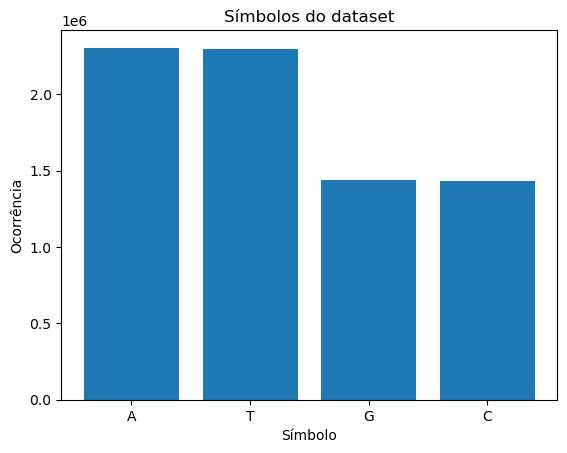

{500: 14963}
500
500


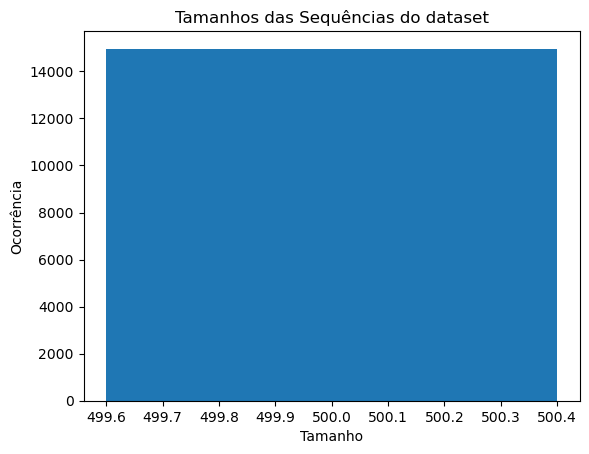

{'0': 7296, '1': 7667}


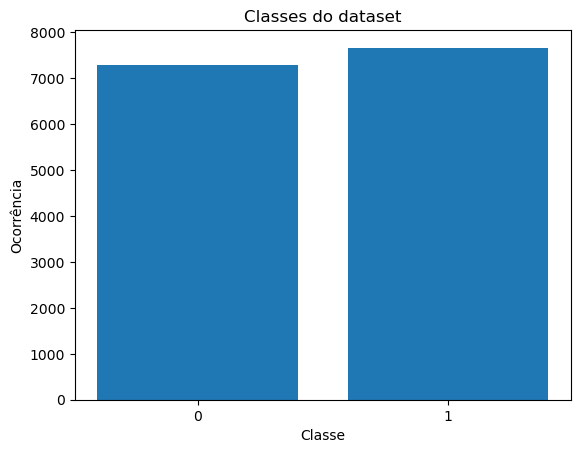

['0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0'

In [6]:
countSymbolsSeq(plt, 'sequence', filteredDf, shouldPrintText=True, shouldPrinHist=True)
countSeqSizes(plt, 'sequence', filteredDf, shouldPrintText=True, shouldPrinHist=True)
countClasses(plt, 'class', filteredDf, shouldPrintText=True, shouldPrinHist=True)

In [7]:
filteredDf.to_csv('h3_csv.csv');